In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("student_depression_dataset.csv")

## Data Anlysis

In [3]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,27901.0,70442.149421,40641.175216,2.0,35039.00,70684.00,105818.00,140699.0
Age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27901.0,3.141214,1.381465,0.0,2.00,3.00,4.00,5.0
Work Pressure,27901.0,0.000430,0.043992,0.0,0.00,0.00,0.00,5.0
CGPA,27901.0,7.656104,1.470707,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.943837,1.361148,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27901.0,0.000681,0.044394,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27901.0,7.156984,3.707642,0.0,4.00,8.00,10.00,12.0
Depression,27901.0,0.585499,0.492645,0.0,0.00,1.00,1.00,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [7]:
cat_columns=[col for col in df.columns if df[col].dtypes=='object']
numeric_columns=[col for col in df.columns if df[col].dtypes!='object']

In [8]:
cat_columns

['Gender',
 'City',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Financial Stress',
 'Family History of Mental Illness']

In [9]:
numeric_columns

['id',
 'Age',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Work/Study Hours',
 'Depression']

In [10]:
df['Gender'].nunique()

2

In [11]:
for cols in cat_columns:
    print(f"Column name : {cols}")
    print(df[cols].nunique())
    print(df[cols].unique())
    print("*"*110)

Column name : Gender
2
['Male' 'Female']
**************************************************************************************************************
Column name : City
52
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']
**************************************************************************************************************
Column name : Profession
14
['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Law

In [12]:
len(numeric_columns)

9

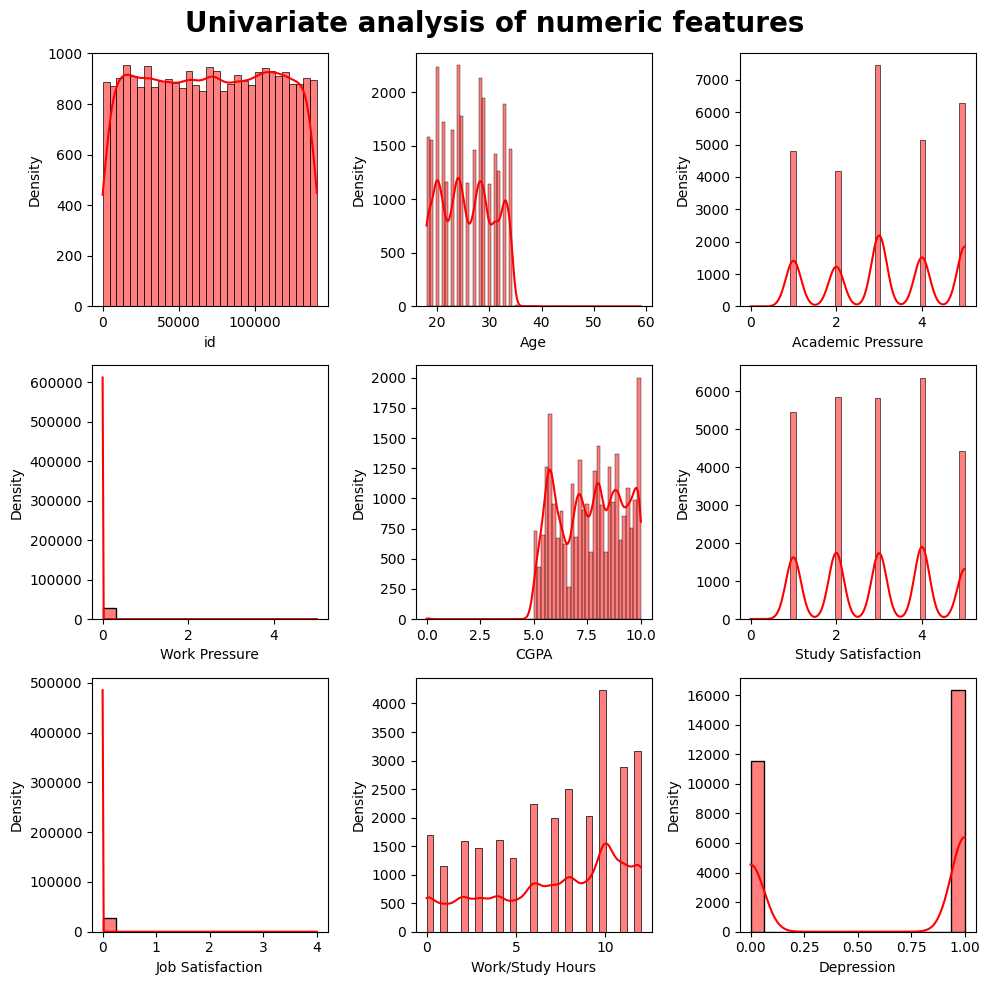

In [13]:
plt.figure(figsize=(10 , 10))
plt.suptitle("Univariate analysis of numeric features" , fontweight='bold' ,fontsize=20)
for i in range(len(numeric_columns)):
    plt.subplot(3 ,3 , i+1)
    sns.histplot(df[numeric_columns[i]] , kde=1 , color='red')
    plt.xlabel(numeric_columns[i])
    plt.ylabel('Density')
    plt.tight_layout()

In [14]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [15]:
df['Depression'].value_counts()

1    16336
0    11565
Name: Depression, dtype: int64

**Based on the above data it can be concluded that 16336 i.e. 58% people in population are in depression**

In [16]:
df[df['Depression']==1].groupby('Gender')['id'].count()

Gender
Female    7221
Male      9115
Name: id, dtype: int64

Text(0, 0.5, 'Count')

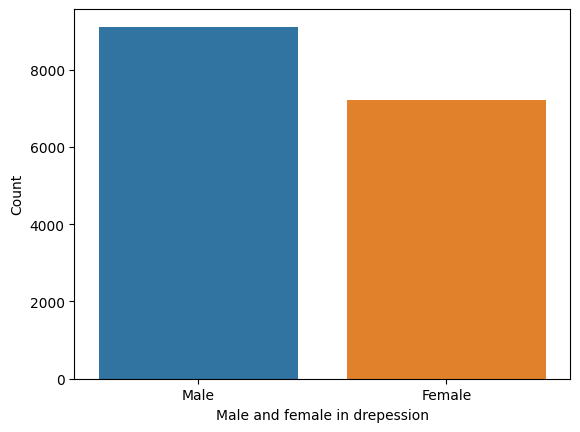

In [17]:
depressed_df=df[df['Depression']==1]
sns.countplot(data=depressed_df , x='Gender')
plt.xlabel('Male and female in drepession')
plt.ylabel('Count')

<Axes: xlabel='Gender', ylabel='count'>

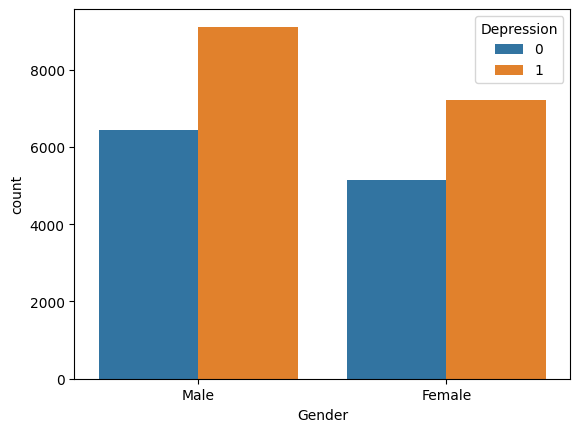

In [18]:
sns.countplot(data=df , x='Gender' , hue='Depression')

**Depression is observed more in males than females**

### City

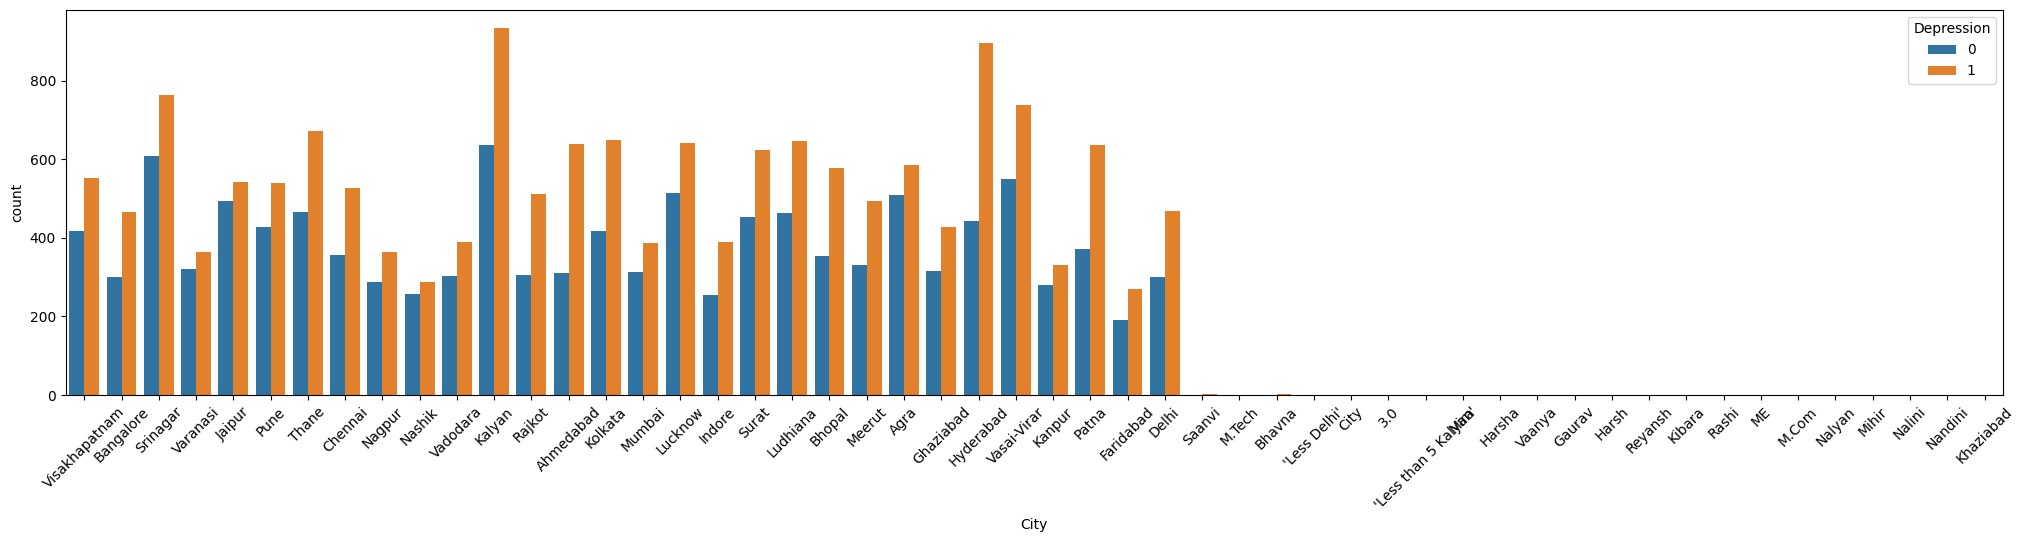

In [19]:
plt.figure(figsize=(25 , 5))
sns.countplot(data=df , x='City' , hue='Depression')
plt.xticks(rotation=45)
plt.show()

In [20]:
happy_df=df[df['Depression']==0]

In [21]:
city_wise_depression=pd.DataFrame(depressed_df.groupby('City')['id'].count()).reset_index()
city_wise_depression.columns=['City' , 'Count']
city_wise_depression=city_wise_depression.sort_values(by='Count' , ascending=False).reset_index(drop=True)
top_10_depressed_city=city_wise_depression.head(10)
top_10_depressed_city

,City,Count
0,Kalyan,934
1,Hyderabad,897
2,Srinagar,763
3,Vasai-Virar,739
4,Thane,673
5,Kolkata,649
6,Ludhiana,647
7,Lucknow,641
8,Ahmedabad,640
9,Patna,636


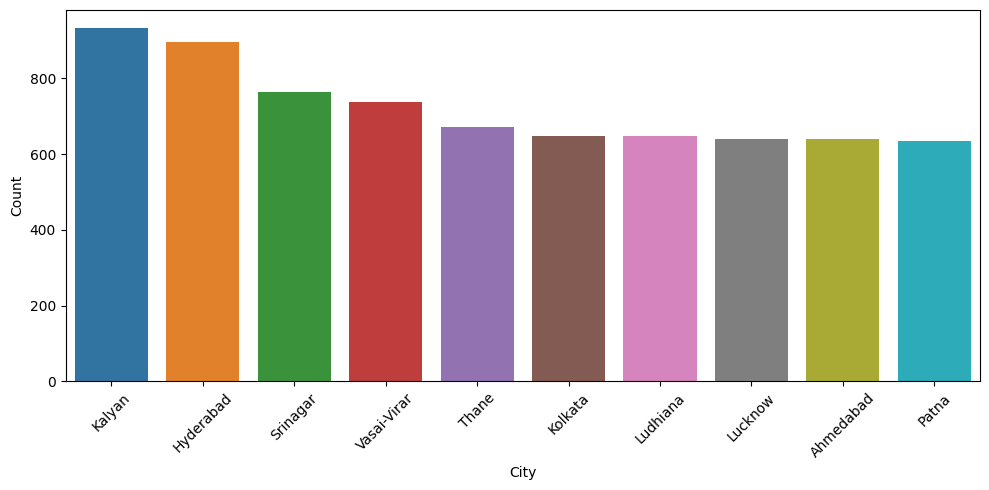

['Kalyan', 'Hyderabad', 'Srinagar', 'Vasai-Virar', 'Thane', 'Kolkata', 'Ludhiana', 'Lucknow', 'Ahmedabad', 'Patna']


In [22]:
plt.figure(figsize=(10 , 5))
sns.barplot(data=top_10_depressed_city , x='City' , y='Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(list(top_10_depressed_city['City']))

In [23]:
happy_city_df=pd.DataFrame(happy_df.groupby('City')['id'].count()).reset_index()
happy_city_df.columns=['City' ,  'Count']
happy_city_df=happy_city_df.sort_values(by='Count' , ascending=False).reset_index(drop=True)
top_10_happy_city=happy_city_df.head(10)
top_10_happy_city

,City,Count
0,Kalyan,636
1,Srinagar,609
2,Vasai-Virar,551
3,Lucknow,514
4,Agra,509
5,Jaipur,493
6,Thane,466
7,Ludhiana,464
8,Surat,453
9,Hyderabad,443


In [24]:
happy_city_df['Count'].sum()

11565

In [25]:
df['Depression'].value_counts()

1    16336
0    11565
Name: Depression, dtype: int64

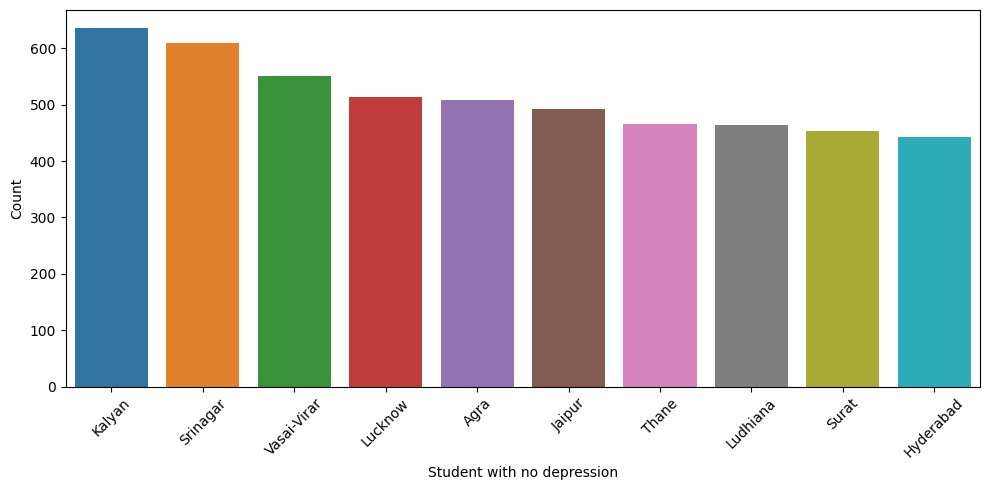

['Kalyan', 'Srinagar', 'Vasai-Virar', 'Lucknow', 'Agra', 'Jaipur', 'Thane', 'Ludhiana', 'Surat', 'Hyderabad']


In [26]:
plt.figure(figsize=(10 , 5))
sns.barplot(data=top_10_happy_city , x='City' , y='Count')
plt.xticks(rotation=45)
plt.xlabel('Student with no depression')
plt.tight_layout()
plt.show()
print(list(top_10_happy_city['City']))

In [27]:
df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', "'Less Delhi'",
       'City', '3.0', "'Less than 5 Kalyan'", 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

In [28]:
city_wise_depression

,City,Count
0,Kalyan,934
1,Hyderabad,897
2,Srinagar,763
3,Vasai-Virar,739
4,Thane,673
5,Kolkata,649
6,Ludhiana,647
7,Lucknow,641
8,Ahmedabad,640
9,Patna,636


In [29]:
city_to_convert=list(city_wise_depression[30:]['City'])
city_to_convert

['Saanvi',
 'Bhavna',
 'Vaanya',
 'City',
 'Harsha',
 'Nalini',
 'Mira',
 'Mihir',
 'M.Com',
 'Gaurav',
 'Khaziabad',
 'Harsh',
 '3.0']

In [30]:
for city in city_to_convert:
    df['City'].replace(city , 'Kalyan' , inplace=True)    

In [31]:
df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'M.Tech', "'Less Delhi'",
       "'Less than 5 Kalyan'", 'Reyansh', 'Kibara', 'Rashi', 'ME',
       'Nalyan', 'Nandini'], dtype=object)

In [32]:
City=pd.DataFrame(df['City'].value_counts()).reset_index()
City.columns=['City' , 'Count']
useless_city_name=list(City[30:]['City'])
useless_city_name

['M.Tech',
 "'Less Delhi'",
 "'Less than 5 Kalyan'",
 'Reyansh',
 'Kibara',
 'Rashi',
 'ME',
 'Nalyan',
 'Nandini']

In [33]:
for city in useless_city_name:
    df['City'].replace(city , 'Kalyan' , inplace=True)    

In [34]:
df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi'], dtype=object)

In [35]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## Profession

In [36]:
df['Profession'].unique()

array(['Student', "'Civil Engineer'", 'Architect', "'UX/UI Designer'",
       "'Digital Marketer'", "'Content Writer'",
       "'Educational Consultant'", 'Teacher', 'Manager', 'Chef', 'Doctor',
       'Lawyer', 'Entrepreneur', 'Pharmacist'], dtype=object)

In [37]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [38]:
temp_df=pd.DataFrame(depressed_df['Profession'].value_counts()).reset_index()
temp_df

,index,Profession
0,Student,16308
1,Architect,7
2,Teacher,5
3,'Digital Marketer',2
4,'Content Writer',2
5,Chef,2
6,Doctor,2
7,Pharmacist,2
8,'Civil Engineer',1
9,'UX/UI Designer',1


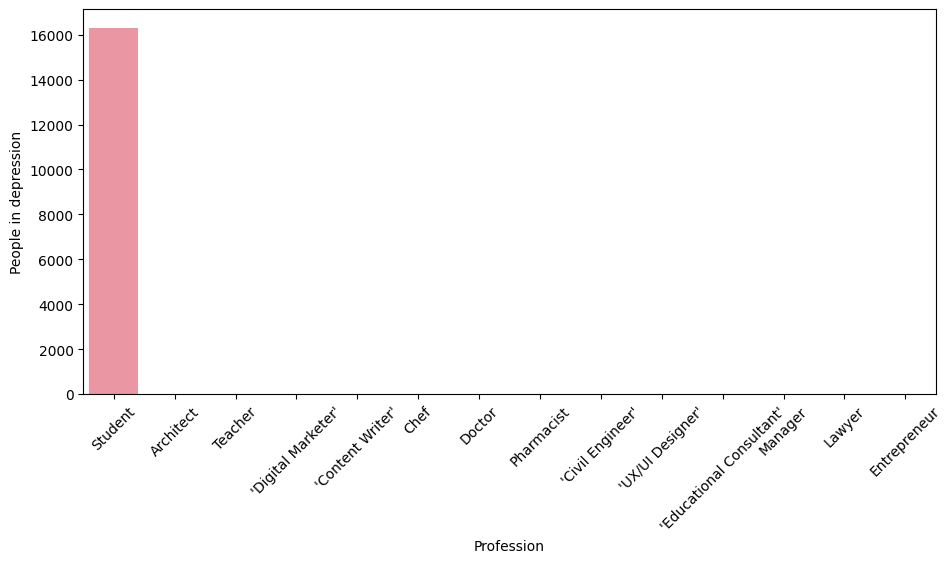

In [39]:
plt.figure(figsize=(11 , 5))
sns.barplot(data=temp_df  , x='index' , y='Profession')
plt.xticks(rotation=45)
plt.xlabel('Profession')
plt.ylabel('People in depression')
plt.show()

In [40]:
happy_df['Profession'].value_counts()

Student               11562
Architect                 1
'Digital Marketer'        1
Teacher                   1
Name: Profession, dtype: int64

In [41]:
happy_df.shape

(11565, 18)

In [42]:
df['Profession'].unique()

array(['Student', "'Civil Engineer'", 'Architect', "'UX/UI Designer'",
       "'Digital Marketer'", "'Content Writer'",
       "'Educational Consultant'", 'Teacher', 'Manager', 'Chef', 'Doctor',
       'Lawyer', 'Entrepreneur', 'Pharmacist'], dtype=object)

In [43]:
df['Profession'].replace("'Civil Engineer'" , 'Civil Engineer' , inplace=True)

In [44]:
df['Profession'].replace("'UX/UI Designer'" , 'UX/UI Designer' , inplace=True)
df['Profession'].replace("'Digital Marketer'" , 'Digital Marketer' , inplace=True)
df['Profession'].replace("'Content Writer'" , 'Content Writer' , inplace=True)
df['Profession'].replace("'Educational Consultant'" , 'Educational Consultant' , inplace=True)

In [45]:
df['Profession'].unique()

array(['Student', 'Civil Engineer', 'Architect', 'UX/UI Designer',
       'Digital Marketer', 'Content Writer', 'Educational Consultant',
       'Teacher', 'Manager', 'Chef', 'Doctor', 'Lawyer', 'Entrepreneur',
       'Pharmacist'], dtype=object)

In [46]:
to_remove=list(df[df['Profession']!='Student'].reset_index()['index'])
to_remove

[113,
 422,
 1845,
 2249,
 2440,
 3220,
 3388,
 3639,
 3841,
 5016,
 8537,
 12124,
 12350,
 14352,
 15472,
 16108,
 17550,
 17585,
 18213,
 20568,
 20801,
 20872,
 22178,
 24121,
 24482,
 25219,
 25335,
 25689,
 26289,
 27109,
 27873]

In [47]:
df.drop(113 , axis=0)

for i in to_remove:
    df.drop(i , axis=0 , inplace=True)

In [48]:
df['Profession'].unique()

array(['Student'], dtype=object)

### Removed all the row where profession was not equal to Student . Now the dataset is purely meant for students

In [49]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## Academic Pressure

In [50]:
df['Academic Pressure'].unique()

array([5., 2., 3., 4., 1., 0.])

In [51]:
df['Academic Pressure']=df['Academic Pressure'].astype('int')

In [52]:
df['Academic Pressure'].unique()

array([5, 2, 3, 4, 1, 0])

In [53]:
temp=pd.DataFrame(df['Academic Pressure'].value_counts()).reset_index()
temp.columns=['Academic Pressure' , 'Count']

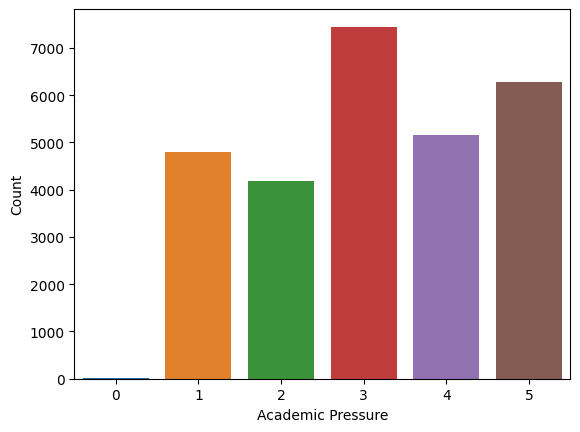

In [54]:
sns.barplot(x=temp['Academic Pressure'] , y=temp['Count'])
plt.show()

5.0    5420
3.0    4489
4.0    3925
2.0    1566
1.0     932
0.0       4
Name: Academic Pressure, dtype: int64


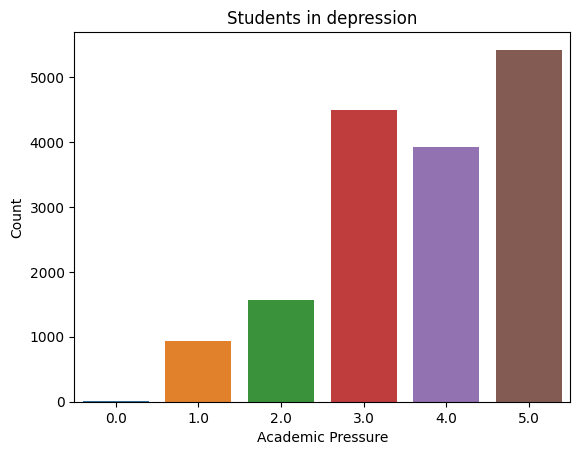

In [55]:
print(depressed_df['Academic Pressure'].value_counts())
temp=pd.DataFrame(depressed_df['Academic Pressure'].value_counts()).reset_index()
temp.columns=['Academic Pressure' , 'Count']
sns.barplot(x=temp['Academic Pressure'] , y=temp['Count'])
plt.title("Students in depression")
plt.show()

1.0    3869
3.0    2973
2.0    2612
4.0    1230
5.0     876
0.0       5
Name: Academic Pressure, dtype: int64


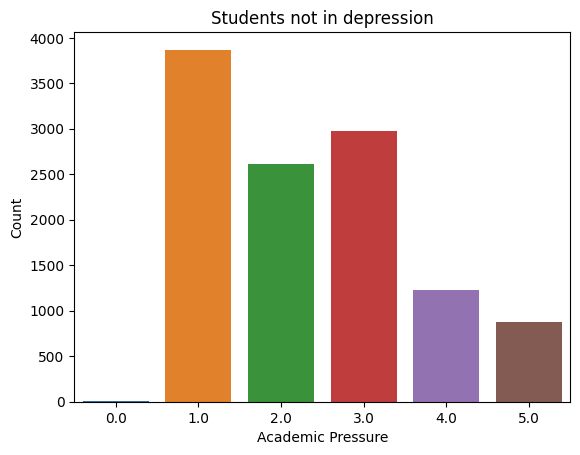

In [56]:
print(happy_df['Academic Pressure'].value_counts())
temp=pd.DataFrame(happy_df['Academic Pressure'].value_counts()).reset_index()
temp.columns=['Academic Pressure' , 'Count']
sns.barplot(x=temp['Academic Pressure'] , y=temp['Count'])
plt.title("Students not in depression")
plt.show()

In [57]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## Work Pressure

In [58]:
df['Work Pressure'].unique()

array([0., 5., 2.])

In [59]:
depressed_df['Work Pressure'].value_counts()

0.0    16335
5.0        1
Name: Work Pressure, dtype: int64

In [60]:
happy_df['Work Pressure'].value_counts()

0.0    11563
5.0        1
2.0        1
Name: Work Pressure, dtype: int64

In [61]:
df.drop(['Work Pressure'] , axis=1 , inplace=True)

In [62]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

## CGPA

In [63]:
df['CGPA'].mean()

7.656027717976319

In [64]:
depressed_df['CGPA'].mean()

7.683587934622919

In [65]:
happy_df['CGPA'].mean()

7.617282317336792

In [66]:
df['CGPA'].max()

10.0

In [67]:
temp=df[df['CGPA']==10.0][['CGPA' , 'Depression']]
temp

,CGPA,Depression
417,10.0,0
1011,10.0,0
1929,10.0,0
2542,10.0,0
2581,10.0,1
3126,10.0,1
3174,10.0,0
3465,10.0,0
4301,10.0,0
4488,10.0,1


In [68]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

## Study Satisfaction

In [69]:
df['Study Satisfaction'].unique()

array([2., 5., 3., 4., 1., 0.])

In [70]:
df['Study Satisfaction']=df['Study Satisfaction'].astype('int')

In [71]:
df['Study Satisfaction'].unique()

array([2, 5, 3, 4, 1, 0])

In [72]:
df['Study Satisfaction'].value_counts()

4    6350
2    5835
3    5812
1    5446
5    4417
0      10
Name: Study Satisfaction, dtype: int64

In [73]:
depressed_df['Study Satisfaction'].value_counts()

1.0    3857
2.0    3768
3.0    3353
4.0    3264
5.0    2088
0.0       6
Name: Study Satisfaction, dtype: int64

In [74]:
happy_df['Study Satisfaction'].value_counts()

4.0    3095
3.0    2468
5.0    2334
2.0    2070
1.0    1594
0.0       4
Name: Study Satisfaction, dtype: int64

In [75]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [76]:
df['Job Satisfaction'].unique()

array([0., 3., 4., 2., 1.])

In [77]:
df['Job Satisfaction'].value_counts()

0.0    27862
2.0        3
4.0        2
1.0        2
3.0        1
Name: Job Satisfaction, dtype: int64

In [78]:
df.drop(['Job Satisfaction'] , axis=1 , inplace=True)

In [79]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## Sleep Duration

In [80]:
df['Sleep Duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [81]:
df['Sleep Duration'].replace("'5-6 hours'" , '5-6 hours' , inplace=True)
df['Sleep Duration'].replace("'Less than 5 hours'" , 'Less than 5 hours' , inplace=True)
df['Sleep Duration'].replace("'7-8 hours'" , '7-8 hours' , inplace=True)
df['Sleep Duration'].replace("'More than 8 hours'" , 'More than 8 hours' , inplace=True)

In [82]:
df['Sleep Duration'].value_counts()

Less than 5 hours    8303
7-8 hours            7337
5-6 hours            6177
More than 8 hours    6035
Others                 18
Name: Sleep Duration, dtype: int64

In [83]:
depressed_df['Sleep Duration'].value_counts()

'Less than 5 hours'    5361
'7-8 hours'            4371
'5-6 hours'            3517
'More than 8 hours'    3078
Others                    9
Name: Sleep Duration, dtype: int64

In [84]:
happy_df['Sleep Duration'].value_counts()

'7-8 hours'            2975
'More than 8 hours'    2966
'Less than 5 hours'    2949
'5-6 hours'            2666
Others                    9
Name: Sleep Duration, dtype: int64

In [85]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## Dietary Habits

In [86]:
df['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [87]:
df['Dietary Habits'].value_counts()

Unhealthy    10309
Moderate      9910
Healthy       7639
Others          12
Name: Dietary Habits, dtype: int64

In [88]:
depressed_df['Dietary Habits'].value_counts()

Unhealthy    7297
Moderate     5558
Healthy      3473
Others          8
Name: Dietary Habits, dtype: int64

In [89]:
happy_df['Dietary Habits'].value_counts()

Moderate     4363
Healthy      4178
Unhealthy    3020
Others          4
Name: Dietary Habits, dtype: int64

In [90]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## Degree

In [91]:
df['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', "'Class 12'",
       'B.Ed', 'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA',
       'B.Com', 'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech',
       'BBA', 'ME', 'MHM', 'Others'], dtype=object)

In [93]:
depressed_df['Degree'].value_counts()

'Class 12'    4303
B.Ed          1021
B.Arch         871
B.Com          853
BCA            819
MSc            679
B.Tech         655
MCA            559
BSc            523
M.Tech         521
BHM            509
B.Pharm        428
M.Ed           415
BBA            407
MBBS           404
M.Com          390
LLB            356
BE             334
BA             321
M.Pharm        314
MBA            303
MD             298
MA             290
PhD            286
LLM            259
MHM             99
ME              98
Others          21
Name: Degree, dtype: int64

In [94]:
happy_df['Degree'].value_counts()

'Class 12'    1777
B.Ed           846
B.Com          653
BCA            614
B.Arch         607
MSc            511
M.Tech         501
B.Tech         497
MCA            485
BHM            416
M.Ed           406
B.Pharm        382
BSc            365
M.Com          344
LLB            315
MBBS           292
BBA            289
BA             279
BE             279
MD             274
M.Pharm        268
MBA            259
MA             254
PhD            236
LLM            223
MHM             92
ME              87
Others          14
Name: Degree, dtype: int64

In [95]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## Have you ever had suicidal thoughts ?

In [96]:
df['Have you ever had suicidal thoughts ?'].value_counts()

Yes    17631
No     10239
Name: Have you ever had suicidal thoughts ?, dtype: int64

In [97]:
depressed_df['Have you ever had suicidal thoughts ?'].value_counts()

Yes    13957
No      2379
Name: Have you ever had suicidal thoughts ?, dtype: int64

In [98]:
happy_df['Have you ever had suicidal thoughts ?'].value_counts()

No     7866
Yes    3699
Name: Have you ever had suicidal thoughts ?, dtype: int64

## Work/Study Hours

In [99]:
df['Work/Study Hours'].unique()

array([ 3.,  9.,  4.,  1.,  0., 12.,  2., 11., 10.,  6.,  8.,  5.,  7.])

In [100]:
df['Work/Study Hours'].value_counts()

10.0    4230
12.0    3167
11.0    2890
8.0     2508
6.0     2247
9.0     2025
7.0     2001
0.0     1699
4.0     1611
2.0     1586
3.0     1467
5.0     1291
1.0     1148
Name: Work/Study Hours, dtype: int64

In [101]:
depressed_df['Work/Study Hours'].value_counts()

10.0    2979
12.0    2169
11.0    1960
8.0     1568
6.0     1288
9.0     1214
7.0     1176
4.0      815
5.0      706
3.0      697
2.0      696
0.0      604
1.0      464
Name: Work/Study Hours, dtype: int64

In [102]:
happy_df['Work/Study Hours'].value_counts()

10.0    1255
0.0     1096
12.0    1003
6.0      959
8.0      941
11.0     932
2.0      894
7.0      825
9.0      812
4.0      799
3.0      773
1.0      686
5.0      590
Name: Work/Study Hours, dtype: int64

In [103]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [121]:
df['Work/Study Hours']=df['Work/Study Hours'].astype('int')

In [122]:
df['Work/Study Hours'].unique()

array([ 3,  9,  4,  1,  0, 12,  2, 11, 10,  6,  8,  5,  7])

## Financial Stress

In [104]:
df['Financial Stress'].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object)

In [105]:
df['Financial Stress'].value_counts()

5.0    6704
4.0    5770
3.0    5219
1.0    5116
2.0    5058
?         3
Name: Financial Stress, dtype: int64

In [106]:
depressed_df['Financial Stress'].value_counts()

5.0    5458
4.0    3990
3.0    3080
2.0    2175
1.0    1632
?         1
Name: Financial Stress, dtype: int64

In [107]:
happy_df['Financial Stress'].value_counts()

1.0    3489
2.0    2886
3.0    2146
4.0    1785
5.0    1257
?         2
Name: Financial Stress, dtype: int64

In [114]:
df['Financial Stress'].replace('?' , 5.0  , inplace=True)

In [115]:
df['Financial Stress'].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0', 5.0], dtype=object)

In [118]:
df['Financial Stress']=df['Financial Stress'].astype('float').astype('int')

In [119]:
df['Financial Stress'].unique()

array([1, 2, 5, 3, 4])

## Family History of Mental Illness

In [108]:
df['Family History of Mental Illness'].unique()

array(['No', 'Yes'], dtype=object)

In [109]:
df['Family History of Mental Illness'].value_counts()

No     14384
Yes    13486
Name: Family History of Mental Illness, dtype: int64

In [110]:
depressed_df['Family History of Mental Illness'].value_counts()

Yes    8273
No     8063
Name: Family History of Mental Illness, dtype: int64

In [111]:
happy_df['Family History of Mental Illness'].value_counts()

No     6335
Yes    5230
Name: Family History of Mental Illness, dtype: int64

In [112]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5,8.97,2,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2,5.90,5,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3,7.03,5,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3,5.59,2,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4,8.13,3,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [123]:
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                          int32
CGPA                                     float64
Study Satisfaction                         int32
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                           int32
Financial Stress                           int32
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [124]:
df['Sleep Duration'].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       'Others'], dtype=object)

In [125]:
df.to_csv("student_depression_dataset_clean.csv" , index=False)

In [126]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5,8.97,2,5-6 hours,Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24.0,Bangalore,Student,2,5.90,5,5-6 hours,Moderate,BSc,No,3,2,Yes,0
2,26,Male,31.0,Srinagar,Student,3,7.03,5,Less than 5 hours,Healthy,BA,No,9,1,Yes,0
3,30,Female,28.0,Varanasi,Student,3,5.59,2,7-8 hours,Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25.0,Jaipur,Student,4,8.13,3,5-6 hours,Moderate,M.Tech,Yes,1,1,No,0
